### Loading Dataset

In [4]:
from sklearn.datasets import load_iris #imports dataset
import numpy as np
import pandas as pd

#loads dataset
data =load_iris().data

#data is a 2d array with 150 rows and 4 columns
data.shape
(150,4)

#loads the lables from Iris dataset
lables=load_iris().target

#indicates an arrays dimensions
lables.shape
(150,)

#combine the data and the class lables using NumPy
#Numpy is for large, multi-dimensional arrays and matrices

#As data is a 2d-array the lables must be reshapped to a 2d array
lables=np.reshape(lables,(150,1))

#Now, you will use the concatenate function available in the numpy 
#library, and you will use axis=-1 which will concatenate based on the
#second dimension.
data=np.concatenate([data,lables],axis=-1)

#150 rows 5 columns, 1 column has been added
data.shape
(150,5)  

#names variable shows the lable names for the iris dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

#created a pandas dataframe that shows the data from iris dataset
#with the lables from names variable
dataset = pd.DataFrame(data,columns=names)

#replaces column value from 0 to Iris-setosa
dataset['species'].replace(0, 'Iris-setosa',inplace=True)
#replaces column value from 0 to Iris-versicolor
dataset['species'].replace(1, 'Iris-versicolor',inplace=True)
#replaces column value from 0 to Iris-virginica
dataset['species'].replace(2, 'Iris-virginica',inplace=True)

dataset.head(10)


,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Analysing Dataset : Sepal length vs. Sepal width'

In [5]:
import matplotlib.pyplot as plt

plt.figure(4, figsize=(10, 10))  #fisize(width,height)

#.scatter(x,y)
#scatter plot,selecting the first 50 rows
#c='colors'
#lable ='column name/label'
plt.scatter(data[:50,0],data[:50,1],c='r',label='iris-setosa')
plt.scatter(data[50:100, 0], data[50:100, 1], c='g',label='Iris-versicolor')
plt.scatter(data[100:, 0], data[100:, 1], c='b',label='Iris-virginica')

plt.xlabel('Sepal length',fontsize=20)
plt.ylabel('Sepal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Sepal length vs. Sepal width',fontsize=20)
plt.legend(prop={'size': 18})
plt.show()

<Figure size 1000x1000 with 1 Axes>

From the above plot, it is very much apparent that there is a high correlation between the Iris setosa flowers w.r.t the sepal length and sepal width. On the other hand, there is less correlation between Iris versicolor and Iris virginica. The data points in versicolor & virginica are more spread out compared to setosa that are dense.

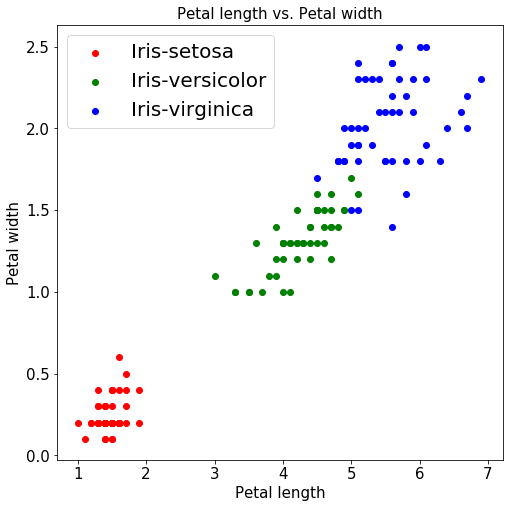

In [6]:
plt.figure(4, figsize=(8, 8))

plt.scatter(data[:50, 2], data[:50, 3], c='r', label='Iris-setosa')

plt.scatter(data[50:100, 2], data[50:100, 3], c='g',label='Iris-versicolor')

plt.scatter(data[100:, 2], data[100:, 3], c='b',label='Iris-virginica')
plt.xlabel('Petal length',fontsize=15)
plt.ylabel('Petal width',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Petal length vs. Petal width',fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

Even when it comes to petal-length and petal-width, the above graph indicates a strong correlation for setosa flowers which are densely clustered together.

Next, to further validate the claim of how petal-length and petal-width are correlated, let's plot a correlation matrix for all the three species.

In [7]:
#correlation matrix
dataset.iloc[:,2:].corr()

#

,petal-length,petal-width
petal-length,1.000000,0.962865
petal-width,0.962865,1.000000


The above table signifies a strong correlation of 0.96 for petal-length and petal-width when all three species are combined.

In [8]:
#correlation matrix for 3 seperate types of flower
#setosa flower is the first 50 samples
dataset.iloc[:50,:].corr()


,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.742547,0.267176,0.278098
sepal-width,0.742547,1.000000,0.177700,0.232752
petal-length,0.267176,0.177700,1.000000,0.331630
petal-width,0.278098,0.232752,0.331630,1.000000


In [9]:
dataset.iloc[50:100,:].corr() #versicolor
#versicolor flower is 50 to 100 samples

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.525911,0.754049,0.546461
sepal-width,0.525911,1.000000,0.560522,0.663999
petal-length,0.754049,0.560522,1.000000,0.786668
petal-width,0.546461,0.663999,0.786668,1.000000


In [10]:
dataset.iloc[100:,:].corr() 
#virginica flower is 100  + samples

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.457228,0.864225,0.281108
sepal-width,0.457228,1.000000,0.401045,0.537728
petal-length,0.864225,0.401045,1.000000,0.322108
petal-width,0.281108,0.537728,0.322108,1.000000


From the above three tables, it is pretty much clear that the correlation between petal-length and petal-width of setosa and virginica is 0.33 and 0.32 respectively. Whereas, for versicolor it is 0.78.

C:\Users\jamie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


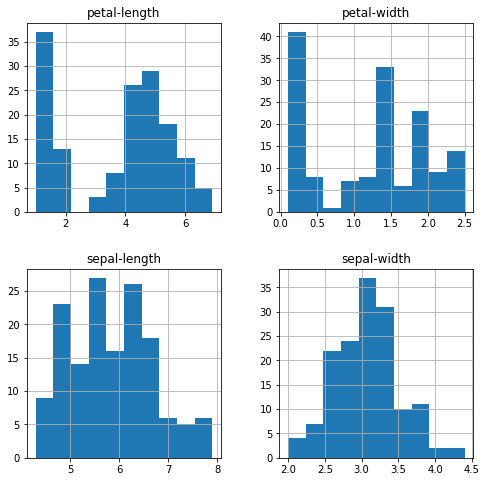

In [11]:
#plot histogram to view the distribtuion
fig=plt.figure(figsize=(8,8))#same as scatter plot,declares plot size
ax=fig.gca() #GCA = get current axes
dataset.hist(ax=ax) #dataset = pandas dataframe, with ax passed as argument
plt.show() #show the plot

The petal-length, petal-width, and sepal-length shows a unimodal distribution, whereas sepal-width shows a kind of Gaussian distribution. All these are useful analysis because then you can think of using an algorithm that works well with this kind of distribution.

In [12]:
#describe that gives you the count, mean, max, min of the data in a tabular format.
#analyze whether all the four attributes are on the same scale
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
#Groups the different classes specifying the sample size per class
print(dataset.groupby("species").size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Preprocessing your data

Normalizing your data
There can be two ways by which you can normalize your data:

Example normalization wherein you normalize each sample individually,
Feature normalization in which you normalize each feature in the same way across all samples.

Well, the answer is pretty much all the time. It is a good practice to normalize your data as it brings all the samples in the same scale and range. Normalizing the data is crucial when the data you have is not consistent. You can check for inconsistency by using the describe() function that you studied above which will give you max and min values. If the max and min values of one feature are significantly larger than the other feature then normalizing both the features to the same scale is very important.


IRIS DATASET DOES NOT REQUIRE ORMALISATION AS THE MAX AND MIN VALUES ARE WITHIN ACCEPTABLE RANGE

The sepal-length attribute has values that go from 4.3 to 7.9 and sepal-width contains values from 2 to 4.4, while petal-length values range from 1 to 6.9 and petal-width ranges from 0.1 to 2.5. The values of all the features are within the range of 0.1 and 7.9, which you can consider acceptable. Hence, you do not need to apply any normalization to the Iris dataset.

### Splitting the data


In data-science, you will often come across a term called Overfitting which means that your model has learned the training data very well but fails to perform on the testing data. So, splitting the data into training and testing or validation set will often help you to know whether your model is overfitting or not.

For training and testing set split, you will use the sklearn library which has an in-built splitting function called train_test_split. So, let's split the data.

In [14]:
#inbuilt function to split dataset into train and test datasets
from sklearn.model_selection import train_test_split

#sklearn.cross_validation.train_test_split(*arrays, **options)
train_data,test_data,train_label,test_label = train_test_split(dataset.iloc[:,:3], dataset.iloc[:,4], test_size=0.2, random_state=42)
#Purely integer-location: selects index using integer identifier

#random_state simply sets a seed to the random generator, 
#so that your train-test splits are always deterministic. 
#If you don't set a seed, it is different each time.


In [15]:
train_data.shape,train_label.shape,test_data.shape,test_label.shape
#sets the shape of the training,testing data array,both lable and row
#(number of rows, number of lables) (120 rows, 3 lables)
#3 lables as there is 3 flowers
((120, 3), (120,), (30, 3), (30,))
#shape of arrays


((120, 3), (120,), (30, 3), (30,))

### k-nearest neighbor algorithm!

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
neighbors = np.arange(1,9)#initlaize variable k with values 1 to 9 as is min and max value
train_accuracy=np.zeros(len(neighbors))
test_accuracy =np.zeros(len(neighbors))


In [18]:
#Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. 
for i,k in enumerate(neighbors): 
    knn=KNeighborsClassifier(n_neighbors=k) #call KNN classifier from sklearn lib
    
    #fit the model using the training data and labels
    knn.fit(train_data,train_label)
    
    #Compute accuracy of the training set
    train_accuracy[i]=knn.score(train_data,train_label)
    
    #Compute accuracy of the test set
    test_accuracy[i] =knn.score(test_data, test_label)
    
    
    


    

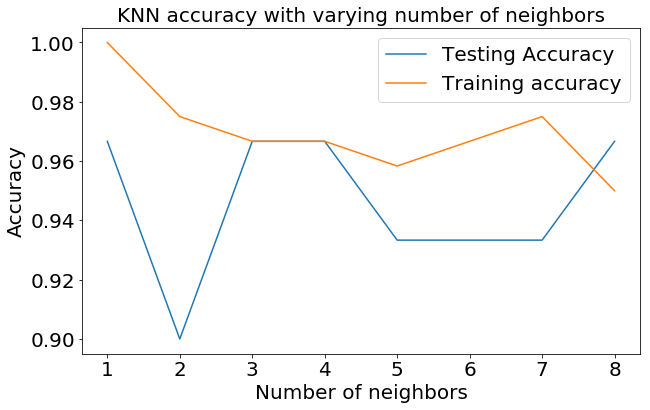

In [19]:
plt.figure(figsize=(10,6))#plot size
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)#title 

#plot(k-variable, dataset, label title)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')

plt.legend(prop={'size': 20}) #legend mini plot right hand corner
plt.xlabel('Number of neighbors',fontsize=20)#-label
plt.ylabel('Accuracy',fontsize=20) #y lable 
plt.xticks(fontsize=20)#font size of x axis
plt.yticks(fontsize=20)#font size of y axis
plt.show()

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
#3 is the optium number of k so lets replace k with 3

#retrain the model
#Fit the model
knn.fit(train_data, train_label)

#Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

#Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)

In [21]:
print("The accuracy of the KNN model is: " + str(test_accuracy))

The accuracy of the KNN model is: 0.9666666666666667


### Evaluating your Model

In [22]:
prediction =knn.predict(test_data)

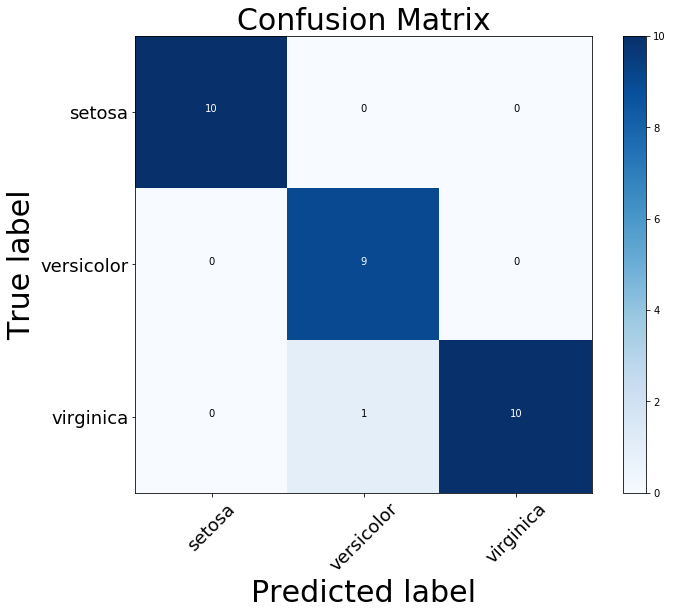

In [31]:
import itertools
from sklearn.metrics import confusion_matrix


#cm=conf maxtrix,classes,no normalise,title,cmap=colour)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=30)
    plt.xlabel('Predicted label',fontsize=30)
    plt.tight_layout()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

class_names = load_iris().target_names


# Compute confusion matrix
cnf_matrix = confusion_matrix(test_label, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))

plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix',fontsize=30)
plt.show()
    
    

In [34]:
from sklearn.metrics import classification_report

print(classification_report(test_label, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
print("End of KNN Tutorial")